In [1]:
# Exploring Monkey Pox NYC Data and comparing initial exposure to COVID-19 rate
# Dataset From NYC Department of Health and Mental Hygiene


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime


# read url data using pandas
url='https://raw.githubusercontent.com/nychealth/monkeypox-data/main/trends/cases-by-day.csv'
df=pd.read_csv(url,delimiter=',')
url2='https://raw.githubusercontent.com/nychealth/monkeypox-data/main/totals/summary-cases.csv'
df2=pd.read_csv(url2,delimiter=',')
url3='https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/cases-by-day.csv'
df3=pd.read_csv(url3,delimiter=',')


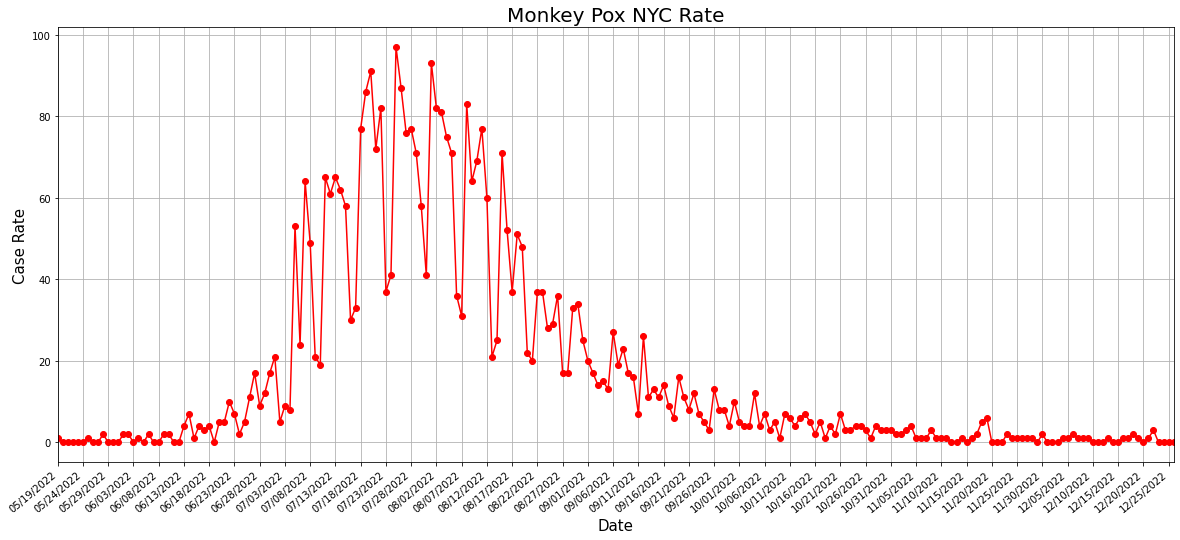

In [7]:
# assign variable to column
x=df['diagnosis_date']

# plot line graph of case rate 
plt.subplots(figsize=(20, 8))
plt.plot(df['diagnosis_date'],df['count'],color='red',marker='o')
plt.title('Monkey Pox NYC Rate', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Case Rate', fontsize=15)
plt.xticks(rotation=40, ha='right')
plt.margins(x=0, y=0.05)

# Use slice notation to slice list x to set ticks every 3rd entry to make room on x axis
plt.xticks(x[::5])
plt.grid(True)
plt.show()

 

In [9]:

# convert string to datetime     
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])

# reindex date using min and max, rename diagnosis date to date
new_df = (df.set_index('diagnosis_date')
      .reindex(pd.date_range(min(df.diagnosis_date), max(df.diagnosis_date), freq='D'))
      .rename_axis(['date'])
      .fillna(0)
      .reset_index())

print(new_df)

# count how many days we have on record
print(len(new_df.date))



          date  count incomplete  case_count_7day_avg   total
0   2022-05-19      1          -                  0.0     0.0
1   2022-05-20      0          -                  0.0     0.0
2   2022-05-21      0          -                  0.0     0.0
3   2022-05-22      0          -                  0.0     0.0
4   2022-05-23      0          -                  0.0     0.0
..         ...    ...        ...                  ...     ...
217 2022-12-22      3        107                  1.0     0.0
218 2022-12-23      0        107                  1.0     0.0
219 2022-12-24      0        107                  1.0     0.0
220 2022-12-25      0        107                  1.0     0.0
221 2022-12-26      0        107                  1.0  3816.0

[222 rows x 5 columns]
222


In [11]:

# creating new column Day to both datasets to plot
new_df = new_df.reset_index()
new_df['Day'] = new_df.index + 1
print(new_df)

df3=df3.reset_index()
df3['Day']=df3.index + 1
print(df3)



     index       date  count incomplete  case_count_7day_avg   total  Day
0        0 2022-05-19      1          -                  0.0     0.0    1
1        1 2022-05-20      0          -                  0.0     0.0    2
2        2 2022-05-21      0          -                  0.0     0.0    3
3        3 2022-05-22      0          -                  0.0     0.0    4
4        4 2022-05-23      0          -                  0.0     0.0    5
..     ...        ...    ...        ...                  ...     ...  ...
217    217 2022-12-22      3        107                  1.0     0.0  218
218    218 2022-12-23      0        107                  1.0     0.0  219
219    219 2022-12-24      0        107                  1.0     0.0  220
220    220 2022-12-25      0        107                  1.0     0.0  221
221    221 2022-12-26      0        107                  1.0  3816.0  222

[222 rows x 7 columns]
      index date_of_interest  CASE_COUNT  PROBABLE_CASE_COUNT  \
0         0       02/29

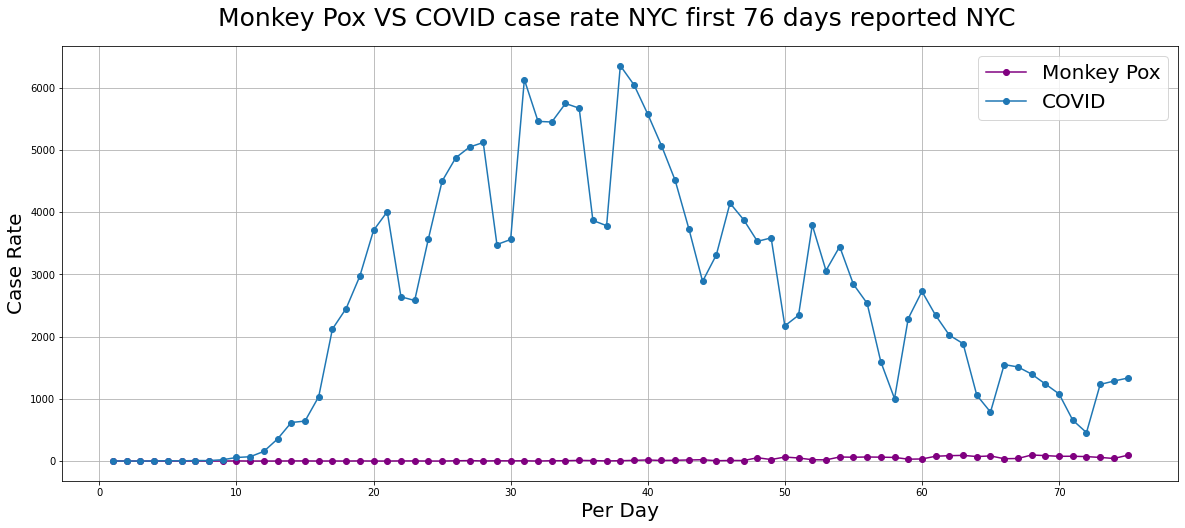

In [13]:
# assigning variables to columns day and daily total to plot
# for both COVID and Monkey POX NYC data
# using iloc function to slice the dataframes and have equal specific rows

x1=new_df['Day'].iloc[0:75]
y1=new_df['count'].iloc[0:75]

x2=df3['Day'].iloc[0:75]
y2=df3['CASE_COUNT'].iloc[0:75]

plt.subplots(figsize=(20, 8))
plt.plot(x1, y1, label = "Monkey Pox" ,marker='o', color='purple')
plt.plot(x2, y2, label = "COVID", marker='o')
plt.legend(fontsize=20)
plt.title('Monkey Pox VS COVID case rate NYC first 76 days reported NYC ', fontsize=25,pad=20)
plt.xlabel('Per Day', fontsize=20)
plt.ylabel('Case Rate', fontsize=20)
plt.grid(True)

plt.show()